> 21231  
> MDSC-303 (Data Visualization)  
> Assignment  

# Table of Contents

1. [Load Libraries](#Load-Libraries)
1. [Data](#Data)
    1. [Features](#Features)
1. [Load Dataset](#Loading-the-Dataset)
1. [Data Preprocessing](#Data-Preprocessing)
1. [How Many Generations?](#How-many-generations?)
1. [Stats Summary](#Stats-Summary)
1. [Relationship Between Variables](#Relationship-Between-Variables)
    1. [Is there any correlation between stats?](#Is-there-any-correlation-between-stats?)
    1. [Any relation between hp, defense, attack and speed?](#Any-relation-between-hp,-defense,-attack-and-speed?)
    1. [Scatterplot for Attack vs Defense](#Scatterplot-for-Attack-vs-Defense)
1. [Change Over Time](#Change-Over-Time)
    1. [Pokemons introduced per Generation](#Pokemons-introduced-per-Generation)
    1. [Ranking Primary Types across Generations](#Ranking-Primary-Types-across-Generations)
1. [Comparision of Groups](#Comparision-of-Groups)
    1. [Primary & Secondary pokemons](#Primary-&-Secondary-pokemons)
    1. [Ghost vs Dark type pokemons](#Ghost-vs-Dark-type-pokemons)
1. [Part-to-Whole](#Part-to-Whole)
    1. [Filtering pokemons with best stats](#Filtering-pokemons-with-best-stats)
1. [Comparision between Datapoints](#Comparision-between-Datapoints)
    1. [Top Bests & Pikachu](#Top-Bests-&-Pikachu)
    1. [Comparing the First Three: Giratina, Palkia, Dialga¶](#Comparing-the-First-Three:-Giratina,-Palkia,-Dialga)
1. [Tables](#Tables)
    1. [Top 15 Common Abilities](#Top-15-Common-Abilities)

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec

import plotly.graph_objects as go
import plotly.express as px

from skimage import io

# Setting the global parameters and templates
\- for visualization libraries

In [2]:
#matplotlib.pyplot

TITLE_SIZE = 30
LABEL_SIZE=20
TITLE_COLOR = '#000000'
LABEL_COLOR = '#707070'

plt.rc('font',size=15)
plt.rc('axes',titlesize=TITLE_SIZE, titlecolor=TITLE_COLOR, titlepad=20)
plt.rc('axes',labelsize=LABEL_SIZE, labelcolor=LABEL_COLOR)

#plotly
custom_template = {
    "layout": go.Layout(
        font={
            "family": "Nunito",
            "size": LABEL_SIZE,
            "color": LABEL_COLOR,
        },
        title={
            "font": {
                "family": "Lato",
                "size": TITLE_SIZE,
                "color": TITLE_COLOR,
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
    )
}

plotly_config = {'displaylogo':False,
                 'displayModeBar':False,
                # 'staticPlot':True,
}

# Data

The dataset contains the varied stats(attack, defense, special attacks,..,japanese name,pokedex_number,generation,..,capture_rate,abilities,etc) of pokemons till generation 7.  
It is taken from kaggle: [The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon)

## Features

- **abilities:** A stringified list of abilities that the pokémon is capable of having.
- **against_?:** Eighteen features that denote the amount of damage taken against a particular type of pokémon.
- **attack:** The base attack of the pokémon.
- **base_egg_steps:** The number of steps required to hatch an egg of the pokémon.
- **base_happiness:** Base happiness of the pokémon.
- **base_total:** Sum of hp, attack, defense, sp_attack, sp_defense and speed.
- **capture_rate:** Capture rate of the pokémon.
- **classification:** The classification of the pokémon as described by the Sun and Moon pokédex.
- **defense:** The base defense of the pokémon.
- **experience_growth:** The experience growth of the pokémon.
- **height_m:** Height of the pokémon in metres.
- **hp:** The base HP of the pokemon. It is short for Hit Point, which determines how much damage a pokémon can receive before fainting.
- **japanese_name:** The original Japanese name of the pokémon.
- **name:** The English name of the pokémon.
- **percentage_male:** The percentage of the species that are male. Blank if the pokémon is genderless.
- **pokedex_number:** The entry number of the pokémon in the National Pokédex.
- **sp_attack:** The base special attack of the pokémon.
- **sp_defense:** The base special defense of the pokémon.
- **speed:** The base speed of the pokémon.
- **type1:** The primary type of the pokémon.
- **type2:** The secondary type of the pokémon.
- **weight_kg:** The weight of the pokémon in kilograms.
- **generation:** The numbered generation which the pokémon was first introduced.
- **is_legendary:** Denotes if the pokémon is legendary.

# Loading the Dataset

In [3]:
# df = pd.read_csv('./Dataset/pokemon.csv',encoding='utf-16-le', on_bad_lines='skip')
df = pd.read_csv('./Dataset/pokemon.csv')
df.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

- **The attributes are ordered alphabetically.**  
We reorder them for better view.

In [4]:
main_attributes = ['name','type1','type2','hp','defense','sp_defense','attack','sp_attack','speed','generation','abilities','base_total','is_legendary']
main_attributes += list(set(df.columns).difference(set(main_attributes)))
df = df[main_attributes]
df.head()

name  type1   type2  hp  defense  sp_defense  attack  sp_attack  \
0   Bulbasaur  grass  poison  45       49          65      49         65   
1     Ivysaur  grass  poison  60       63          80      62         80   
2    Venusaur  grass  poison  80      123         120     100        122   
3  Charmander   fire     NaN  39       43          50      52         60   
4  Charmeleon   fire     NaN  58       58          65      64         80   

   speed  generation  ... against_rock  against_fire  against_normal  \
0     45           1  ...          1.0           2.0             1.0   
1     60           1  ...          1.0           2.0             1.0   
2     80           1  ...          1.0           2.0             1.0   
3     65           1  ...          2.0           0.5             1.0   
4     80           1  ...          2.0           0.5             1.0   

   against_dragon  against_psychic against_steel  against_dark  height_m  \
0             1.0              2.0           1.0           1.0       0.7   
1             1.0              2.0           1.0           1.0       1.0   
2             1.0              2.0           1.0           1.0       2.0   
3             1.0              1.0           0.5           1.0       0.6   
4             1.0              1.0           0.5           1.0       1.1   

  weight_kg  percentage_male  
0       6.9             88.1  
1      13.0             88.1  
2     100.0             88.1  
3       8.5             88.1  
4      19.0             88.1  

[5 rows x 41 columns]

# Data Preprocessing

In [5]:
df.shape

(801, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   type1              801 non-null    object 
 2   type2              417 non-null    object 
 3   hp                 801 non-null    int64  
 4   defense            801 non-null    int64  
 5   sp_defense         801 non-null    int64  
 6   attack             801 non-null    int64  
 7   sp_attack          801 non-null    int64  
 8   speed              801 non-null    int64  
 9   generation         801 non-null    int64  
 10  abilities          801 non-null    object 
 11  base_total         801 non-null    int64  
 12  is_legendary       801 non-null    int64  
 13  against_bug        801 non-null    float64
 14  against_ground     801 non-null    float64
 15  classfication      801 non-null    object 
 16  against_fairy      801 non

In [7]:
df.duplicated().value_counts()

False    801
dtype: int64

**Inference:**
- We have **801 pokemons with 41 stats.**
- All features are of suitable variable type.
- Many have **missing heights, weights,** percentage male and type2. Out of these for type2 we can fill None - indicating that the pokemon has no type2.
- There are **no duplicate rows.**
- There is typo in column name 'classification'.

In [8]:
# correcting the 'classfication' typo in column name
df['classification'] = df.classfication
df = df.drop(columns=['classfication'])

# Filling the NULL values at type2 as None 
df['type2'] = df.type2.fillna('None')

# How many generations?

In [9]:
df.generation.unique()

array([1, 2, 3, 4, 5, 6, 7])

- **7 Generations.**
- **NO Generation 8.**

# Stats summary

In [10]:
# Important Ones
imp = ['hp','attack','defense','speed','height_m','weight_kg','sp_attack','sp_defense']
df[imp].describe().transpose()

count       mean         std   min   25%   50%    75%    max
hp          801.0  68.958801   26.576015   1.0  50.0  65.0   80.0  255.0
attack      801.0  77.857678   32.158820   5.0  55.0  75.0  100.0  185.0
defense     801.0  73.008739   30.769159   5.0  50.0  70.0   90.0  230.0
speed       801.0  66.334582   28.907662   5.0  45.0  65.0   85.0  180.0
height_m    781.0   1.163892    1.080326   0.1   0.6   1.0    1.5   14.5
weight_kg   781.0  61.378105  109.354766   0.1   9.0  27.3   64.8  999.9
sp_attack   801.0  71.305868   32.353826  10.0  45.0  65.0   91.0  194.0
sp_defense  801.0  70.911361   27.942501  20.0  50.0  66.0   90.0  230.0

**Inference:**
- For many the mean and even 3rd quartile lies below or on 100, but their max is easily crossing 200, thus indicating **right skewed distribution.**

# **Relationship Between Variables**

## Is there any correlation between stats?

**We remove:**
- **pokedex_number**: It doesnt convey meaning to check with it. Though it can show high correlation with generation.
- **base_total**: As it is just the sum of hp, dfense, attack, sp_attack, sp_defense.

In [11]:
corr = df.drop(columns=['pokedex_number','base_total']).corr()  #finding the correlations
c = abs(corr)>0.6  #condition for high correlation
d = abs(corr)<1
corr = corr.where(c&d)   #taking highly correlated features
n = corr.shape[1]
NaNs = corr.columns[corr.isna().sum()==n].values  #features with no high corr with any other features
corr = corr.drop( columns=NaNs)  #dropping those features along both axis
corr = corr.drop(index=NaNs)

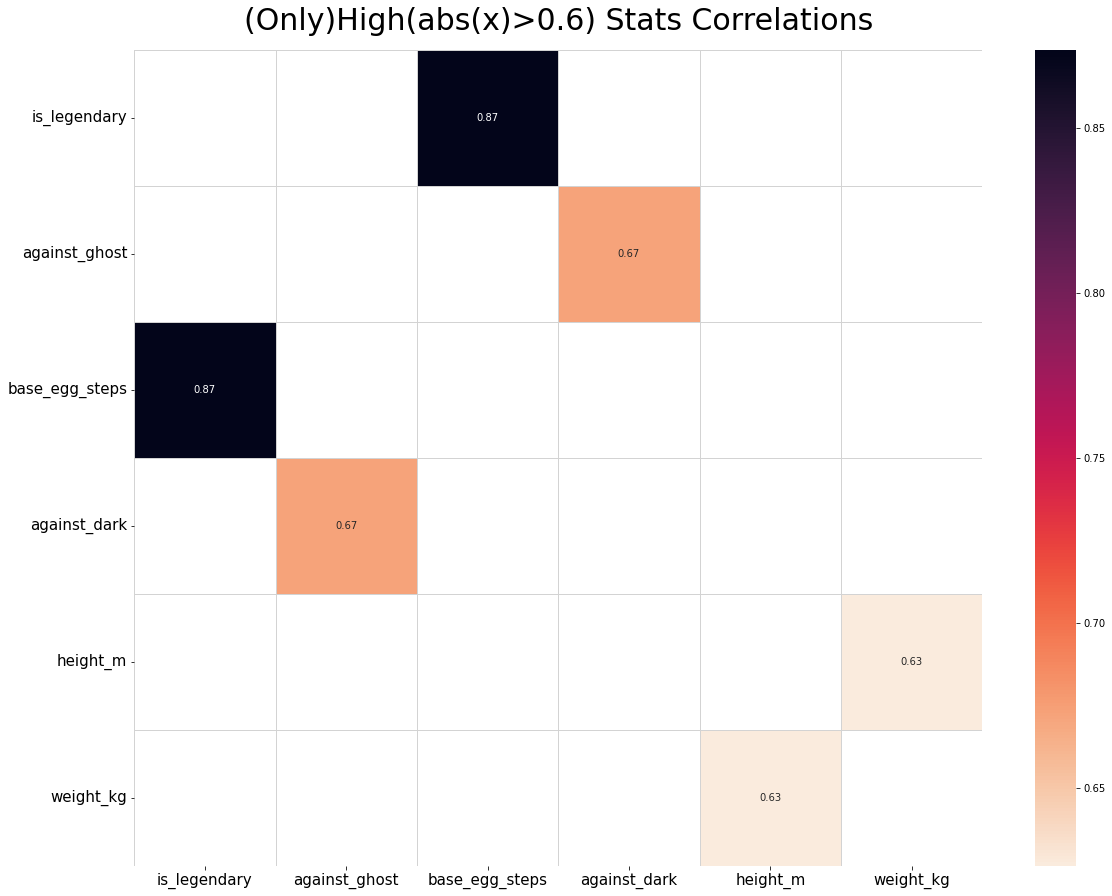

In [12]:
#plotting
plt.figure(figsize=(19,15))
sns.heatmap(corr, fmt='.2g', annot=True,linewidths=1, linecolor='lightgrey', cmap='rocket_r')
plt.title("(Only)High(abs(x)>0.6) Stats Correlations")
plt.xticks(size=15)
plt.yticks(size=15, rotation=0)
plt.show()

**Inference:**
- **The correlation between same feature has been dropped.**
- Only **abs(correlation)>0.6** are taken.
- We observe no high negative correlation.
- We need **more steps to hatch legendary pokemons than normal.**
- Height is highly correlated to weight.
- **Attacks against ghost type also works good against dark type or vice versa.**

### Why correlation heatmap?
- Features are numerical in nature.  
- Need to examine the correlation between those features.
- Correlation Heatmap gives one-glance idea for correlation between all possible airs.
Here only the highest correlations are shown as showing correlation for all would become too crowded.

### Design Principles
1. Showing just the highest correlations - few things at a time.
1. Encoding the intensity of correlation with hue.
1. Providing support marker - grid to aid readers.

## Any relation between hp, defense, attack and speed?

Though from above correlation heatmap we see that there is no high correlation between the base stats.  

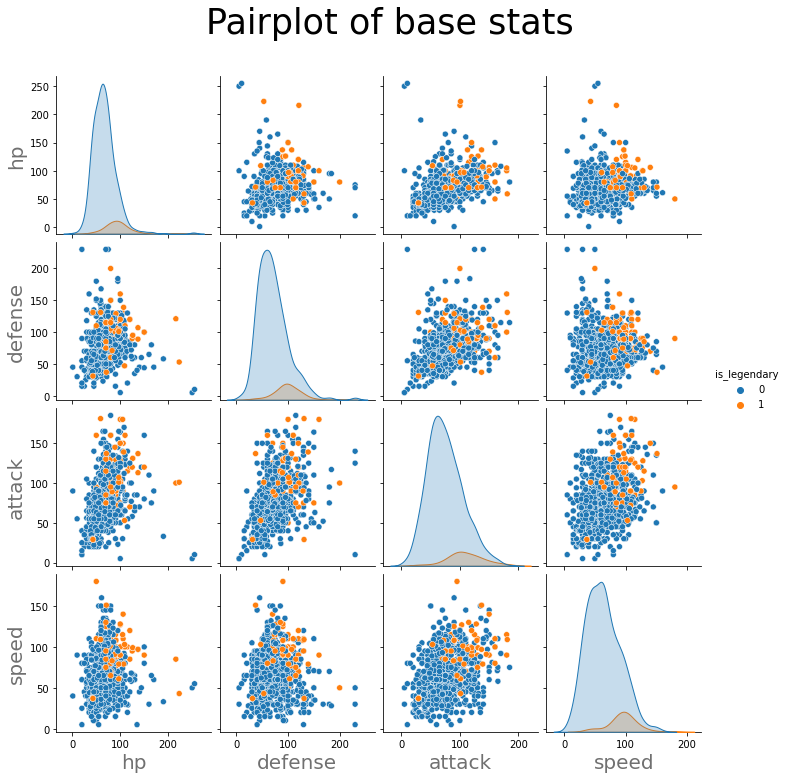

In [13]:
#plotting
base_stats = ['hp','defense','attack','speed']
g = sns.pairplot(data=df, x_vars=base_stats, y_vars=base_stats, hue='is_legendary')
g.fig.suptitle('Pairplot of base stats',y=1.08, size=35)
plt.show()

**Inference:**
- Attcak and defense may not be expected to have linear correlation as the datapoints fans out towards high values - indicating non-homoskedacity.
- The distributions are mostly right skewed.
- The stats for the legendary pokemons typically appears on the high ends.

### Why pairplot?
- Best way to visualize relationship between variables is scatterplot.
- Pairplot is the collection of possible scatterplots between features.
- Above correlation heatmap showed that others are not having high correlation but they may be having non-linear relationship also.
- Below pairplot also shows us the distribution of features.

### Design Principles
1. Organized display of scatterplot of important featuer pairs.
1. Display of density plot in the diagonal to give further information.
1. Categorical encoding using colors.

## Scatterplot for Attack vs Defense

When we think of a pokemon first thing we see are **attack and defense.** So we want to investigate deeper in their relationship.  

And the interactive graphs of plotly shows us exactly which point is which pokemon. Adding the pokemon names as labels to the points makes the visualization too much cluttered


In [14]:
tmp = df.copy()
tmp['is_legendary'] = df.is_legendary.astype(str)
fig = px.scatter(data_frame=tmp, x='attack',y='defense', color='is_legendary',
           hover_data=['name','attack','defense'],
           title="Attack vs Defense scatterplot",
          height=800, width=800,
                template=custom_template)
fig.show(config= plotly_config)

**Inference:**
- Happiny has the lowest stats for both.
- **Heracross - non-legendary pokemon - has largest attack.**
- **Aggron, steelix and shuckle - non-legendary pokemons - have the highest(outlier) defense.**
- **Legendary pokemons tend to have higher attack & defense stats.**

Happiny is a Normal-type Baby Pokémon introduced in Generation IV. She is one among pokemons with highest base_happiness in the franchise.

### Why scatterplot?
- We have pairs of values for the two features.
- Scatterplot also gives us the sense of joint distribution.
- It also gives us the idea of correlation between features.  

### Design Principles
1. Pushing non-data items (labels,tics,etc) to background with light colors.
1. Categorical encoding using color to give better information.

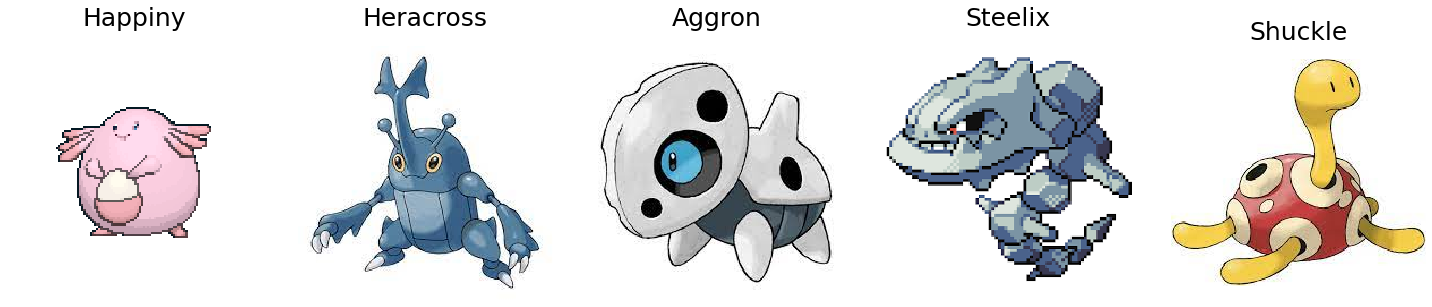

In [15]:
#Displaying images of above highlight pokemons
images = ['Happiny','Heracross','Aggron','Steelix','Shuckle']
i=0
plt.figure(figsize=(20,10))
for image in images:
  title = image
  plt.subplot(1,5,i+1)
  i+=1
  im = io.imread('./Images/'+title.lower()+'.jpeg')
  io.imshow(im)
  plt.title(title, fontsize=25)
  plt.axis('off')
plt.show()

# **Change Over Time**

## Pokemons introduced per Generation

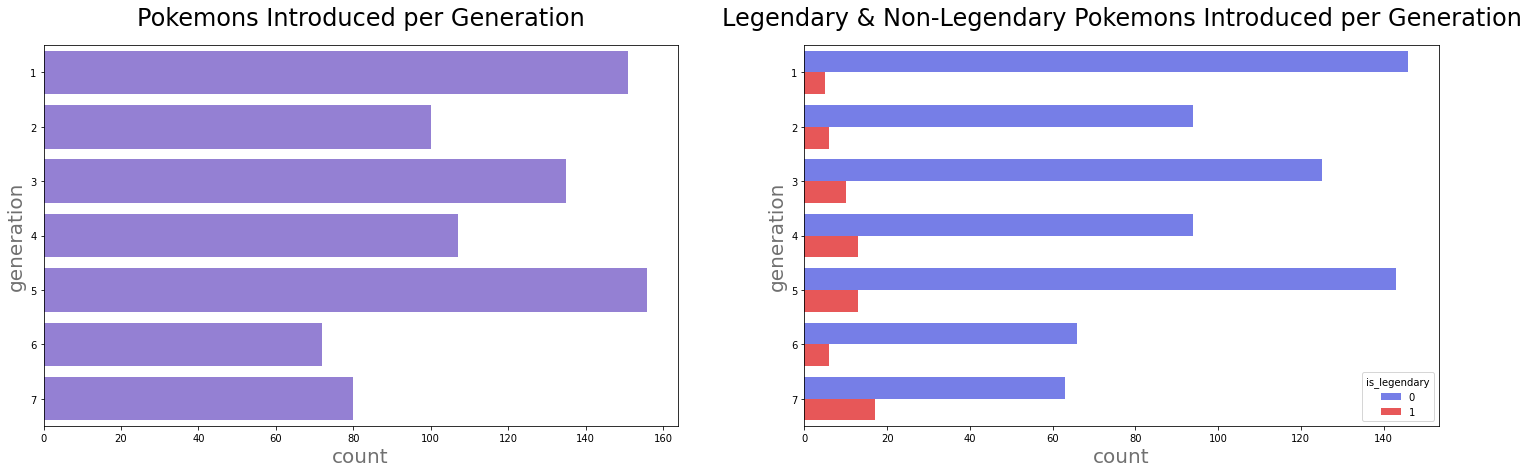

In [16]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.countplot(data = df, y='generation', color='#8D72E1')
plt.title('Pokemons Introduced per Generation', size=24)

plt.subplot(1,2,2)
sns.countplot(data = df, y='generation', hue='is_legendary', palette=['#636efa','#ff3f41'])
plt.title('Legendary & Non-Legendary Pokemons Introduced per Generation', size=24)

plt.show()

**Inference:**
- There was relatively **less addition of new pokemons in 6th and 7th generations.**
- Generally **more recent generation tend to have more added legendary pokemons, exception 6th gen.**

### Why Bar plots?
- Simple value comparision among multiple groups(here Generation).

### Design Principles
1. Denoting categories with colors.
1. Zero-based scales.

## Ranking Primary Types across Generations

Using bump chart we can see the Primary Types introduced in each generation.  
Here they are ranked by the count of that type pokemon introduced in the certain generation.

In [17]:
#computing values
tmp = df.groupby(['generation'])['type1'].value_counts().sort_index()  #getting the number of types for each generation
for i in range(1,8):
  tmp[i] = (len(tmp[i]) - tmp[i].sort_values().argsort()).sort_index() #ranking the types for each generation; no overlapping ranks;

types = df.type1.unique()

In [18]:
(len(tmp[i]) - tmp[i].sort_values().argsort()).sort_index() 

type1
bug         13
dark         1
dragon       5
electric     6
fairy        2
fighting     7
fire        11
ghost        8
grass       15
ground       3
normal      16
poison       9
psychic     12
rock        10
steel        4
water       14
Name: type1, dtype: int64

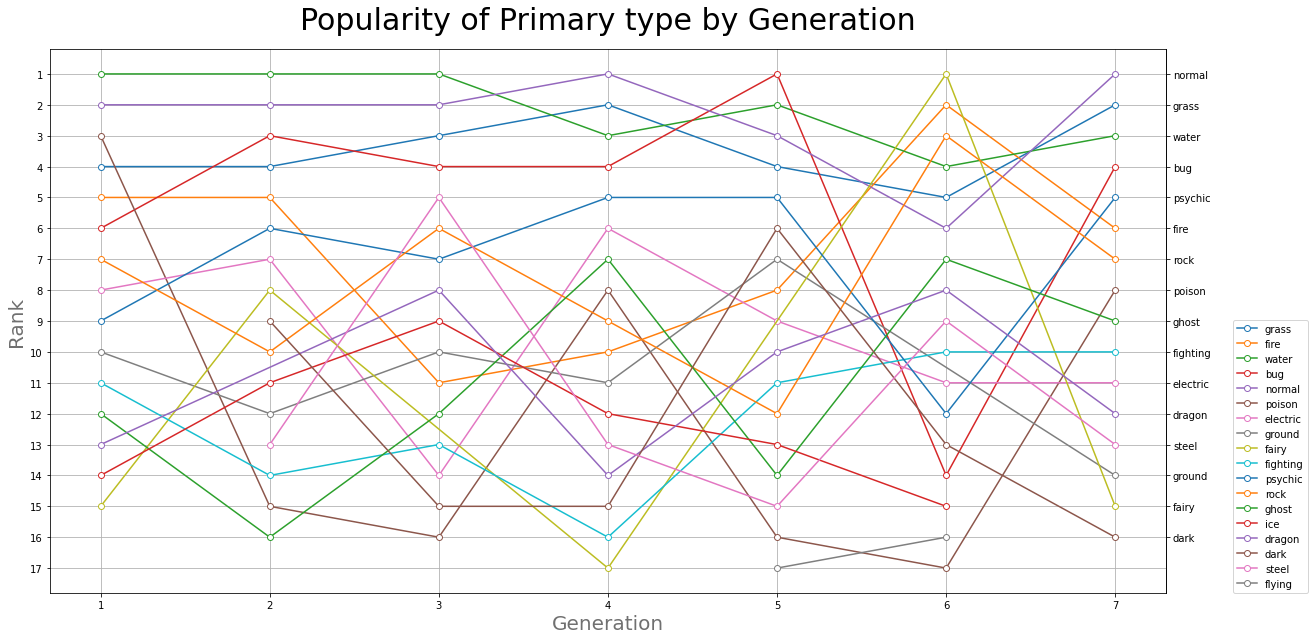

In [19]:
#plotting bump chart using the line plots in matplotlib.pyplot

from matplotlib.ticker import FixedFormatter, FixedLocator

fig, ax = plt.subplots(figsize=(20,10))

#secondary axis
yax2 = ax.secondary_yaxis("right")
yax2.yaxis.set_major_locator(FixedLocator(tmp[7]))
yax2.yaxis.set_major_formatter(FixedFormatter(tmp[7].index))

#plotting the lines
for t in types:
  x = tmp[:,t].sort_index().index.values
  y = tmp[:,t]
  # x = np.arange len(y)
  ax.plot(x,y,'o-', mfc='w', label=t)

#setting support markers
ax.set_yticks(np.arange(1,18), size=15)
ax.grid()


ax.set(xlabel='Generation',ylabel='Rank',title='Popularity of Primary type by Generation')
ax.invert_yaxis() #make top as first
plt.legend(loc=(1.06,0))
plt.show() 

**Inference:**
- Water and Normal type pokemons are almost always on the top.
- Dark primary type was introduced from Gen-II onwards.
- The bottom line at Gen-V and Gen-VI indicates Flying type, which exists only there.
- Above chart is not ideal for too many features.

### Why Bump Chart?
Because its the best option to visualize ranking across time.

### Design Principles
1. Support markers(background grid) to provide better reading.
2. Color encoding for categorical variables.

# **Comparision of Groups**

## Primary & Secondary pokemons

In [20]:
#computing values
tmp = pd.DataFrame(df.type1.value_counts())
tmp['type']='Type-1'
tmp.columns = ['count','type']

tmp2 = pd.DataFrame(df.type2.value_counts())
tmp2['type']='Type-2'
tmp2.columns = ['count','type']

tmp12 = pd.concat([tmp,tmp2])
tmp12 = tmp12.reset_index()
tmp12.columns = ['Type','Count','Type-class']

In [21]:
#plotting

fig = px.histogram( data_frame=tmp12, x='Count',y='Type',color='Type-class',
                  barmode='group', height=700, width=1400,
                  title='Type-1 and Type-2 class',
                  labels={'sum of Count':'Count'},
                  template=custom_template)
fig.update_yaxes(categoryorder='trace')
fig.layout
fig.show()

**Inference:**
- Vividly **many pokemons dont have type-2.**
- **Water type is the most prevalent type-1.** But relatively few have water type as type-2.
- **Flying type is the most prevalent type-2.** But relatively few have flying type as type-1.
- **Normal type is also most prevalent type-1.**

### Why Bar plots?
- Function used is histogram but is implemented like a bar plot only.
- Multiple groups with single value each.
- Comparision of values among groups.

### Design Principles
1. Zero based scale.
1. Multigraph to visualize multiple categories.
1. Ordering the type-1 values to give better idea.

## Ghost vs Dark type pokemons

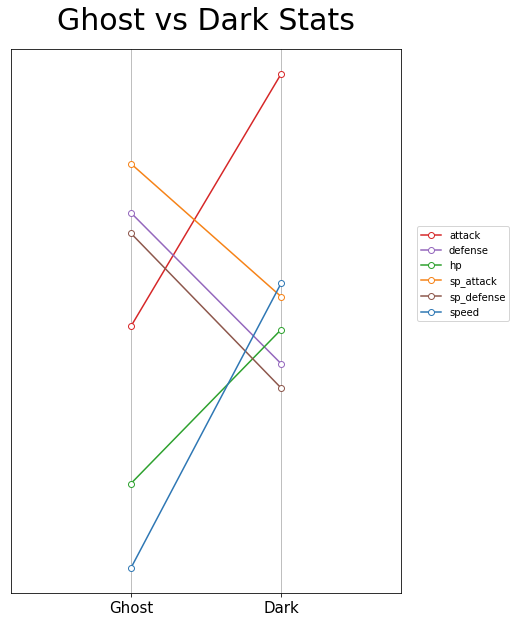

In [22]:
attributes = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']
colors = ['#d62728','#9467bd','#2da12e','#f68318','#8d574c','#2e77b4']
gh = df[df.type1=='ghost'].describe()[attributes].loc['mean'].sort_index()
da = df[df.type1=='dark'].describe()[attributes].loc['mean'].sort_index()

lines = list(zip(gh,da)) #zipping to get (x,y) pairs

plt.figure(figsize=(7,10))
#plotting the lines
i=0
for line in lines:
  plt.plot([1,2],line,'o-', mfc='w', label=attributes[i],color=colors[i])
  i+=1

plt.gca().margins(x=0.8) #the ghost & dark vertical lines
plt.xticks([1,2],['Ghost','Dark'], size=15)
plt.grid(axis='x')
plt.legend(loc=(1.04,0.5))
plt.yticks([])
plt.title('Ghost vs Dark Stats')
plt.show()

**Inference:**
- Dark type is more offense oriented.
- Dark type is better balanced than Ghost type.
- Ghost type excels in defense comparatively.

### Why Slope Chart?
- Comparision of multiple values between two groups.
- Slope chart gives perception of easy and quick indicator for change.

### Design Principles
1. Selected few stats taken to lessen the cluttering in chart.
1. Color encoding for different variables.
1. Denoting the trend using the slope of the line.

# **Part to Whole**

## Filtering pokemons with best stats
Pokemons with stats above 80% quantile

In [23]:
features = ['attack','defense','speed','hp','sp_attack','sp_defense'] #above average for these features

#getting the limits; need to get the global average
lims={}
for f in features:
  lims[f]=df[f].median()

lims = df.quantile(.80)[features]

vals1 = []
tmp1 = df[df.is_legendary==1]  #just for legendary
for f in features:
  tmp1 = tmp1[tmp1[f]>lims[f]]
  vals1.append(len( tmp1))

vals2 = []
tmp2 = df[df.is_legendary==0] #just for non legendary
for f in features:
  tmp2 = tmp2[tmp2[f]>lims[f]]
  vals2.append(len( tmp2))


fig = go.Figure()
fig.add_trace(go.Funnel(y=features, x=vals1, name='Legendary',marker={'color':'#ff3f41'}))
fig.add_trace(go.Funnel(y=features, x=vals2, name='Non-Legendary',marker={'color':'#636efa'}))

fig.update_layout(title="Filtering Best Pokemons Funnel Chart")
fig.show()

**Inference:**
- Only 3 pokemons have all given stats above 80% quantile.
- All of them are legendary.

### Why Funnel Chart?
- Because here we are filtering the pokemons with stats one by one.

### Design Principles
1. Color encoding for different categories.
1. Using length of the horizontal bars to give relative-quantitative value estimation.

In [24]:
print("The 3 pokemons:",tmp1.name.values)

The 3 pokemons: ['Rayquaza' 'Palkia' 'Arceus']


# **Comparision between Datapoints**

## Why Radar chart?

Though as per the design principles Multiple grouped bar charts, parallel coordinates plot,etc are preferred over Radar charts on the basis that Radar chart distorts the perception as actual comparision is based upon the points values but Radar charts gives perception of area of the polygon formed thus giving sideway view.  

But **gaming community is very much acquainted and used to Radar charts** as almost every online game compares stats via Radar charts. And **Pokemon franchise was started as and is still a gaming industry** more compard to the media and entertainment sectors of it.  
    Thus here we chose the Radar charts.

## Design Principles
1. Selected few stats taken.
1. Color encoding for different variables.


## Top Bests & Pikachu

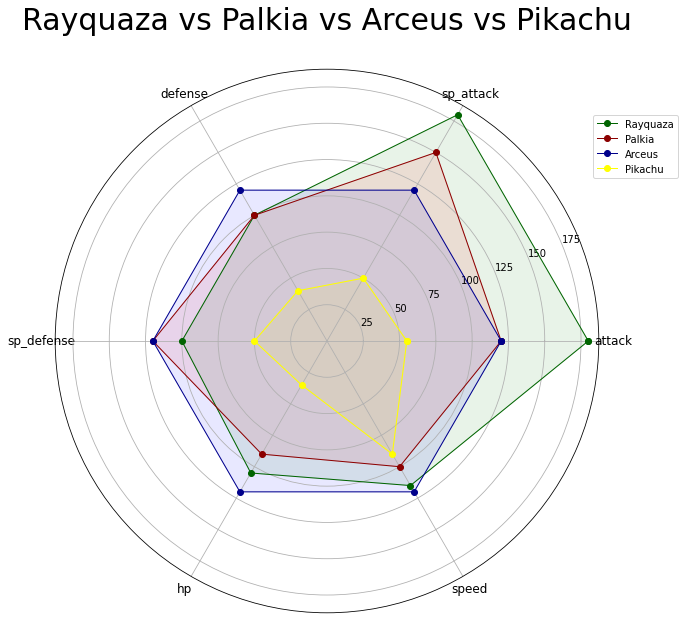

In [25]:
names = ['Rayquaza','Palkia','Arceus','Pikachu'] #Pokemons to compare
fillColors = ['green','red','blue','yellow']
edgeColors = ['darkgreen','darkred','darkblue','yellow']

attributes = ['attack','sp_attack','defense','sp_defense','hp','speed'] #stats that we compare upon

radars = [] #list of pokemon stats

for name in names:
  radars.append(df[df.name==name][attributes].values.tolist()[0]) #getting their stats

angles = np.linspace(0,2*np.pi, len(attributes),endpoint=False)  #polar lines of chart
angles=np.concatenate((angles,[angles[0]]))

attributes.append(attributes[0])  #completing the polygon radar
for radar in radars:
  radar.append(radar[0])

  
#START PLOTTING
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,polar=True) #initiating polar chart

i=0
for radar in radars:  #plotting the pokemon stats on charts
  ax.plot(angles, radar,'o-',color=edgeColors[i], linewidth=1,label=names[i])
  ax.fill(angles, radar, alpha=0.09, color=fillColors[i])
  i+=1

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12) #adding the stats-labels to the angles
ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,names, loc=(0.99,0.80))

title = ' vs '.join(names)
ax.set_title(title, pad=40)

plt.show()

**Inference:**
- From the scatter plot we take **Heracross(highest atk) and Aggron(one of the highest def) and compare it with Arceus(most balanced pokemon.)**
- We can see that **Heracross and Aggron are having high stats in only for specific ones** while in other they lag far behind.
- The sp_attack, sp_defense, hp and speed advantage of Arceus(The Original One) is sufficient to defeat both.
- Pikachu is strong in friendship.

## Comparing the First Three: Giratina, Palkia, Dialga

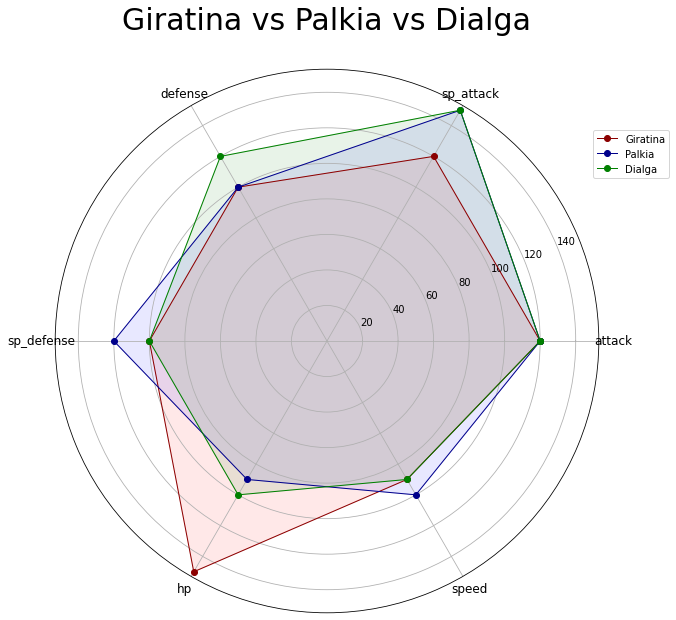

In [26]:
names = ['Giratina','Palkia','Dialga'] #Pokemons to compare
fillColors = ['red','blue','green']
edgeColors = ['darkred','darkblue','green']

attributes = ['attack','sp_attack','defense','sp_defense','hp','speed'] #stats that we compare upon

radars = [] #list of pokemon stats

for name in names:
  radars.append(df[df.name==name][attributes].values.tolist()[0]) #getting their stats

angles = np.linspace(0,2*np.pi, len(attributes),endpoint=False)  #polar lines of chart
angles=np.concatenate((angles,[angles[0]]))

attributes.append(attributes[0])  #completing the polygon radar
for radar in radars:
  radar.append(radar[0])

  
#START PLOTTING
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,polar=True) #initiating polar chart

i=0
for radar in radars:  #plotting the pokemon stats on charts
  ax.plot(angles, radar,'o-',color=edgeColors[i], linewidth=1,label=names[i])
  ax.fill(angles, radar, alpha=0.09, color=fillColors[i])
  i+=1

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)#adding the stats-labels to the angles
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,names, loc=(0.99,0.80))

title = ' vs '.join(names)
ax.set_title(title, pad=40)

plt.show()

**Inference:**
- Giratina has unusually high HP, but its lacking in defense and sp_attack.
- Palkia has well balanced sp_defense, attack and speed but lacks in hp.
- Dialga has high defense, sp_attack and attack but lacks in other stats.
- **Overall they can prove to be proper rival of each other.**

# **Tables**

## Top 15 Common Abilities
These are the abilities that a specific pokemon can possess.

### Why Tables?
- Data is just a single digit, for each unique label.
- Its easy to compare specific values.

### Design principles
1. Showing the raw numbers when only a single value present.

In [27]:
abilities_list = df.abilities.apply(lambda x: list(x.replace('[\'','').replace('\', \'',',').replace('\']','').split(',')))
unique_abilities = list(set(abilities_list.aggregate('sum')))

print("Total Unique Abilities:",len(unique_abilities))

tmp = pd.Series(abilities_list.aggregate('sum')).value_counts().sort_values(ascending=False)[:15]
pd.DataFrame(tmp, columns=['Occurence'])

Total Unique Abilities: 227


Occurence
Sturdy              41
Swift Swim          38
Keen Eye            37
Chlorophyll         35
Levitate            33
Inner Focus         32
Intimidate          31
Swarm               25
Sheer Force         25
Pressure            25
Sand Veil           24
Run Away            24
Oblivious           24
Thick Fat           23
Overgrow            23

**Inference:**
- Sturdy is the most common ability found. [In game it helps weak pokemons to withstand One Shot Knock Out Moves]